In [3]:
import numpy as np
import pandas as pd

# 선형회귀
- 특성이 하나 혹은 그 이상인 경우에 데이터에서 최적의 선형관계를 찾는 것
- 찾은 선형관계(혹은 초평면)를 기반으로 예측을 수행

In [47]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df1 = pd.read_csv('../data/Fish.csv')
df2 = pd.read_csv('../data/AnotherFish.csv')
# 두 데이터가 동일한 조건이나 분포에서 수집되었을 때 전체 데이터를 균등하게 반영 

# 전체 데이터를 균등하게 반영하는 경우 두 데이터프레임을 연결해야 한다(*현재 컬럼의 구조는 동일함)
df = pd.concat([df1, df2], ignore_index=True)

- csv파일의 농어(perch) 정보
    - Length' columns은 1이 입부터 꼬리지느러미 직전까지
    - 2가 입부터 꼬리 가장 긴 끝 대각선 길이
    - 3은 입부터 꼬리 끝까지이나 몸통의 곡률을 반영한 길이

In [26]:
perch_df = df.loc[df['Species'] == 'Perch']
perch_length = perch_df[['Length2']]
perch_weight = perch_df[['Weight']]

In [37]:
# len2를 기반으로 예측하고싶은 weight를 넣엇다
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight)

In [38]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(train_input, train_target)

LinearRegression()

In [39]:
lr.score(test_input, test_target)

0.5347023145936758

In [40]:
lr.coef_ # 가중치

array([[16.29342681]])

In [41]:
lr.intercept_ # 절편값

array([-30.08189471])

Text(0.5, 1.0, 'AnotherFish.csv is random data. you can ignore it.')

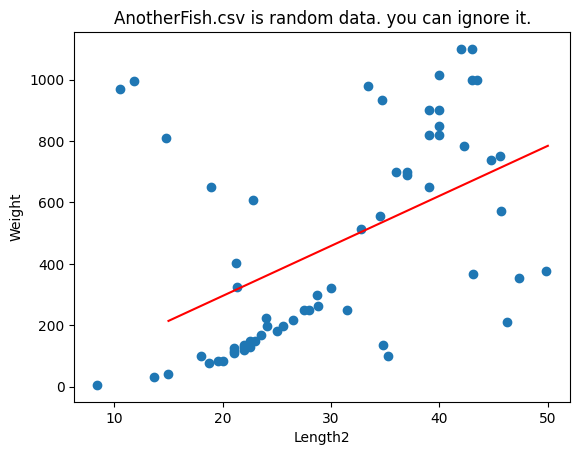

In [46]:
plt.scatter(train_input, train_target)
plt.plot([15, 50], [15 * 16.29 - 30, 50 * 16.29 - 30], color='red')
plt.xlabel('Length2')
plt.ylabel('Weight')
plt.title('AnotherFish.csv is random data. you can ignore it.')